# Simpsons Project

**The whole idea of the project** - is to say to show human how much he/she looks like a character from `"The Simpsons"`

**Plan**
0. Get data
  * I guess, to improve model perfomance on human face - I have to find images of people, who looks similar to the characters.
1. First look at data
2. Create DataLoaders
 * Transform images
3. Build model
4. Train model
5. See the results
6. Create web for model

## 0. Get Data

### 0.1 Importing data from kaggle

**Note**: Probably, I have to save `kaggle.json` everytime I'm using this notebook.

In [ ]:
import kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!ls

sample_data


In [ ]:
!pwd

/content


In [ ]:
!pwd
import os
os.mkdir('data')
os.chdir('/content/data')
!pwd

/content
/content/data


In [ ]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

100% 1.08G/1.08G [00:11<00:00, 143MB/s]
100% 1.08G/1.08G [00:11<00:00, 97.2MB/s]


In [ ]:
!pwd
os.chdir('/content')
!pwd

/content/data
/content


### 0.2 Unziping file

In [ ]:
import zipfile
from pathlib import Path

data_dir = Path('data')
with zipfile.ZipFile(data_dir / 'the-simpsons-characters-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall(data_dir)

### 0.3 Preparing test dataset

Train dataset looks good.
```
simpsons_dataset/
  ├── abraham_grampa_simpson/
  │   ├── pic_0000.jpg
  │   ├── pic_0001.jpg
  │   └── ...
  ├── ...
  └── waylon_smithers/
```

Test dataset looks a little bit worse.
```
kaggle_simpson_testset/
  ├── abraham_grampa_simpson_0.jpg
  ├── abraham_grampa_simpson_1.jpg
  ├── abraham_grampa_simpson_2.jpg
  ├── ...
  └── sideshow_bob_9.jpg
```

To make work with it more comfortable let's create directory for each character ( like in the train dataset )

In [ ]:
train_dir = data_dir / 'simpsons_dataset'
test_dir = data_dir / 'kaggle_simpson_testset/kaggle_simpson_testset'

train_dir, test_dir

(PosixPath('data/simpsons_dataset'),
 PosixPath('data/kaggle_simpson_testset/kaggle_simpson_testset'))

In [ ]:
test_characters = []
for pic in test_dir.glob('*.*'):
  name = str(pic).split('/')[-1].split('.')[0]
  without_digit = '_'.join(name.split('_')[:-1])
  test_characters.append(without_digit)

test_characters = list(set(test_characters))
test_characters

['abraham_grampa_simpson',
 'homer_simpson',
 'sideshow_bob',
 'edna_krabappel',
 'moe_szyslak',
 'krusty_the_clown',
 'charles_montgomery_burns',
 'apu_nahasapeemapetilon',
 'ned_flanders',
 'kent_brockman',
 'milhouse_van_houten',
 'comic_book_guy',
 'lisa_simpson',
 'lenny_leonard',
 'mayor_quimby',
 'principal_skinner',
 'chief_wiggum',
 'bart_simpson',
 'marge_simpson',
 'nelson_muntz']

In [ ]:
import os, sys
import shutil
from tqdm.auto import tqdm
import time

cwd = os.getcwd()

try:
  for pic in tqdm(test_dir.glob('*.*')):
    file_name = str(pic).split('/')[-1]
    name = file_name.split('.')[0]
    name_without_digit = '_'.join(name.split('_')[:-1])

    os.chdir(test_dir)
    if os.path.exists(name_without_digit):
      print(f'[INFO] File {name}.jpg moving to this folder: {name_without_digit}')
      shutil.move(file_name, name_without_digit)
    else:
      print(f'[INFO] Creating new directory "{name_without_digit}"')
      os.mkdir(name_without_digit)
      print(f'[INFO] File {name}.jpg moving to this folder: {name_without_digit}')
      shutil.move(file_name, name_without_digit)

    print('='*10)
    os.chdir(cwd)

except:
  print("Something wrong with specified directory.\nException: ", sys.exc_info())

finally:
  print('-'*20)
  print("Restoring the path")
  os.chdir(cwd)
  print("Current directory is-", os.getcwd())

0it [00:00, ?it/s]

[INFO] Creating new directory "apu_nahasapeemapetilon"
[INFO] File apu_nahasapeemapetilon_9.jpg moving to this folder: apu_nahasapeemapetilon
[INFO] Creating new directory "lenny_leonard"
[INFO] File lenny_leonard_16.jpg moving to this folder: lenny_leonard
[INFO] Creating new directory "milhouse_van_houten"
[INFO] File milhouse_van_houten_10.jpg moving to this folder: milhouse_van_houten
[INFO] Creating new directory "krusty_the_clown"
[INFO] File krusty_the_clown_21.jpg moving to this folder: krusty_the_clown
[INFO] Creating new directory "principal_skinner"
[INFO] File principal_skinner_0.jpg moving to this folder: principal_skinner
[INFO] File apu_nahasapeemapetilon_28.jpg moving to this folder: apu_nahasapeemapetilon
[INFO] File lenny_leonard_18.jpg moving to this folder: lenny_leonard
[INFO] Creating new directory "nelson_muntz"
[INFO] File nelson_muntz_6.jpg moving to this folder: nelson_muntz
[INFO] File nelson_muntz_9.jpg moving to this folder: nelson_muntz
[INFO] Creating new

In [ ]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(test_dir)

There are 20 directories and 0 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset'.
There are 0 directories and 49 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/ned_flanders'.
There are 0 directories and 50 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz'.
There are 0 directories and 48 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns'.
There are 0 directories and 50 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/marge_simpson'.
There are 0 directories and 50 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon'.
There are 0 directories and 49 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy'.
There are 0 directories and 50 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson'.
There are 0 directories and 50 images in 'data/kaggle_simpson_testset/kaggle_simpson_testset/principal_skinner'.
There are 0

### 0.4 Rename folders to `train` and `test`

And save them to `data`

In [ ]:
def rename_folder(path, rename_path):
  if os.path.exists(path):
    os.rename(path, rename_path)
    print(f'[INFO] Folder {path} succesfuly renamed.')
  else:
    print(f'[INFO] This folder ({path}) is not exists.')

rename_folder(train_dir, '/content/data/train')
rename_folder(test_dir, '/content/data/test')

os.rmdir('/content/data/kaggle_simpson_testset')

[INFO] Folder data/simpsons_dataset succesfuly renamed.
[INFO] Folder data/kaggle_simpson_testset/kaggle_simpson_testset succesfuly renamed.


In [ ]:
shutil.rmtree('/content/data/train/simpsons_dataset')

In [ ]:
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

train_dir, test_dir

(PosixPath('data/train'), PosixPath('data/test'))

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 0.5 Leave only neccesary characters ( with high number of photos )

In [ ]:
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

characters = list(map_characters.values())

In [ ]:
def remove_superfluous(path, neccesary):
  for pic in Path(path).glob('*/'):
    if str(pic.stem) not in neccesary:
      shutil.rmtree(pic)

  print(f'[INFO] All unnecessary directories from {path} are deleted.')

remove_superfluous(train_dir, characters)
remove_superfluous(test_dir, characters)

[INFO] All unnecessary directories from data/train are deleted.
[INFO] All unnecessary directories from data/test are deleted.


## 1. First look at the data

marge_simpson
Random image path: data/train/marge_simpson/pic_0435.jpg
Image class: marge_simpson
Image height: 464
Image width: 320


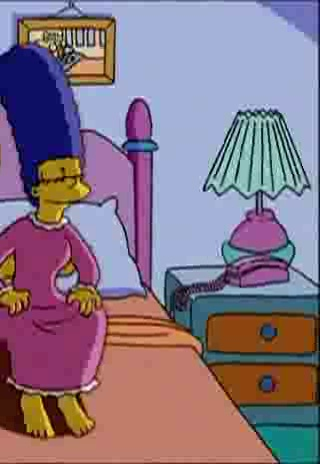

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

random.seed(42)

image_path_list = list(train_dir.glob('*/*.jpg'))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

### 1.1 Take a look at 12 random images

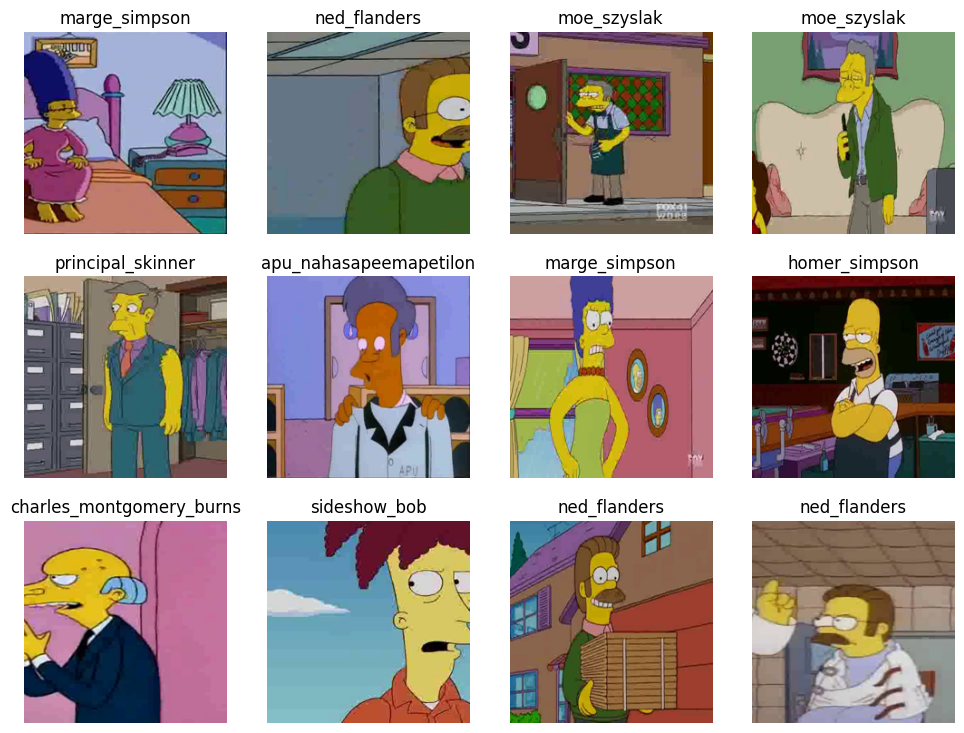

In [ ]:
random.seed(42)

image_path_list = list(train_dir.glob('*/*.jpg'))

random_image_path = random.sample(image_path_list,k=12)

fig, axs = plt.subplots(3,4, figsize=(12,9))

for i, ax in enumerate(axs.ravel()):
  img = Image.open(random_image_path[i])
  img = img.resize((224,224))

  image_class = random_image_path[i].parent.stem

  ax.imshow(img)
  ax.set_title(image_class)

  ax.axis(False)

plt.show()

## 3. Build a model

In [ ]:
import torch
from torch import nn

import torchvision

def create_resnet(num_classes,
                     seed=42):

  torch.manual_seed(seed)
  weights = torchvision.models.ResNet34_Weights.DEFAULT

  model = torchvision.models.resnet34(weights=weights)

  transformer = weights.transforms()

  for param in model.parameters():
    param.requires_grad = False

  num_features = model.fc.in_features

  model.fc = nn.Linear(num_features, num_classes)

  return model, transformer

In [ ]:
model, transformer = create_resnet(42)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 76.9MB/s]


In [ ]:
transformer

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
from torchvision import transforms

IMAGE_SIZE = 224

train_transformer = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.RandomChoice( [
                              transforms.RandomHorizontalFlip(p=0.5),
                              transforms.ColorJitter(contrast=0.9),
                              transforms.ColorJitter(brightness=0.1),
                              transforms.RandomApply( [ transforms.RandomHorizontalFlip(p=1), transforms.ColorJitter(contrast=0.9) ], p=0.5),
                              transforms.RandomApply( [ transforms.RandomHorizontalFlip(p=1), transforms.ColorJitter(brightness=0.1) ], p=0.5),
                              ] ),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transformer = transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
        transforms.CenterCrop(IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

## 4. Create DataLoaders


In [ ]:
walk_through_dir(train_dir)

There are 18 directories and 0 images in 'data/train'.
There are 0 directories and 1454 images in 'data/train/ned_flanders'.
There are 0 directories and 358 images in 'data/train/nelson_muntz'.
There are 0 directories and 1193 images in 'data/train/charles_montgomery_burns'.
There are 0 directories and 1291 images in 'data/train/marge_simpson'.
There are 0 directories and 623 images in 'data/train/apu_nahasapeemapetilon'.
There are 0 directories and 469 images in 'data/train/comic_book_guy'.
There are 0 directories and 1354 images in 'data/train/lisa_simpson'.
There are 0 directories and 1194 images in 'data/train/principal_skinner'.
There are 0 directories and 1452 images in 'data/train/moe_szyslak'.
There are 0 directories and 1342 images in 'data/train/bart_simpson'.
There are 0 directories and 1206 images in 'data/train/krusty_the_clown'.
There are 0 directories and 1079 images in 'data/train/milhouse_van_houten'.
There are 0 directories and 877 images in 'data/train/sideshow_bob'.

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transformer)

test_data = datasets.ImageFolder(root=test_dir,
                                transform=test_transformer)

class_names = train_data.classes

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [ ]:
len(train_dataloader), len(test_dataloader), class_names

(594,
 28,
 ['abraham_grampa_simpson',
  'apu_nahasapeemapetilon',
  'bart_simpson',
  'charles_montgomery_burns',
  'chief_wiggum',
  'comic_book_guy',
  'edna_krabappel',
  'homer_simpson',
  'kent_brockman',
  'krusty_the_clown',
  'lisa_simpson',
  'marge_simpson',
  'milhouse_van_houten',
  'moe_szyslak',
  'ned_flanders',
  'nelson_muntz',
  'principal_skinner',
  'sideshow_bob'])

## 5. Train model

Create a function to train our model

In [ ]:
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          scheduler,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        scheduler.step()

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

### 5.1 Optimizer and loss function

In [ ]:
model, transformer = create_resnet(len(class_names))

In [ ]:
LEARNING_RATE = 0.1
MIN_LEARNING_RATE = 1e-6

loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                       mode='min',
                                                       factor=0.1,
                                                       patience=3,
                                                       min_lr=MIN_LEARNING_RATE,
                                                       verbose=True)

In [ ]:
model_results = train(model = model,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                loss_fn=loss_fn,
                scheduler=scheduler,
                epochs=15,
                device=device
                )

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 9.5666 | train_acc: 0.5834 | test_loss: 7.5613 | test_acc: 0.6449
Epoch: 2 | train_loss: 7.6861 | train_acc: 0.6861 | test_loss: 5.1682 | test_acc: 0.7836
Epoch: 3 | train_loss: 7.6433 | train_acc: 0.7202 | test_loss: 6.6889 | test_acc: 0.7758
Epoch: 4 | train_loss: 8.8670 | train_acc: 0.7268 | test_loss: 8.3242 | test_acc: 0.7563
Epoch: 5 | train_loss: 8.7759 | train_acc: 0.7490 | test_loss: 9.8799 | test_acc: 0.7546
Epoch 00006: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 6 | train_loss: 9.3588 | train_acc: 0.7493 | test_loss: 7.8183 | test_acc: 0.7908
Epoch: 7 | train_loss: 4.8246 | train_acc: 0.8334 | test_loss: 4.6328 | test_acc: 0.8287
Epoch: 8 | train_loss: 4.3166 | train_acc: 0.8394 | test_loss: 4.3879 | test_acc: 0.8318
Epoch: 9 | train_loss: 4.0914 | train_acc: 0.8381 | test_loss: 4.2309 | test_acc: 0.8298
Epoch: 10 | train_loss: 3.8110 | train_acc: 0.8436 | test_loss: 3.9841 | test_acc: 0.8413
Epoch: 11 | train_loss: 3.5944 | train_acc: 0.8

In [ ]:
model_1, transformer = create_resnet(len(class_names))

In [ ]:
LEARNING_RATE = 0.1

loss_fn_1 = nn.CrossEntropyLoss(label_smoothing=0.1)

optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=LEARNING_RATE)
scheduler_1 = torch.optim.lr_scheduler.StepLR(optimizer=optimizer_1,
                                            step_size=2,
                                            gamma=0.1,
                                            last_epoch=-1,
                                            verbose=True)

Adjusting learning rate of group 0 to 1.0000e-01.


In [ ]:
model_1_results = train(model = model_1,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer_1,
                loss_fn=loss_fn_1,
                scheduler=scheduler_1,
                epochs=10,
                device=device
                )

  0%|          | 0/10 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 1 | train_loss: 10.9960 | train_acc: 0.5401 | test_loss: 9.1974 | test_acc: 0.5799
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 2 | train_loss: 9.6846 | train_acc: 0.6132 | test_loss: 13.4474 | test_acc: 0.6349
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 3 | train_loss: 5.6497 | train_acc: 0.7762 | test_loss: 4.9030 | test_acc: 0.7782
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 4 | train_loss: 4.1215 | train_acc: 0.7803 | test_loss: 3.6068 | test_acc: 0.7947
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 5 | train_loss: 3.2924 | train_acc: 0.8108 | test_loss: 3.3759 | test_acc: 0.8053
Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 6 | train_loss: 3.1636 | train_acc: 0.8091 | test_loss: 3.2413 | test_acc: 0.8033
Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 7 | train_loss: 3.0778 | train_acc: 0.8086 | test_loss: 3.2674 | test_acc: 0.8031
Adjusting learning rate o

### Model perfomance

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

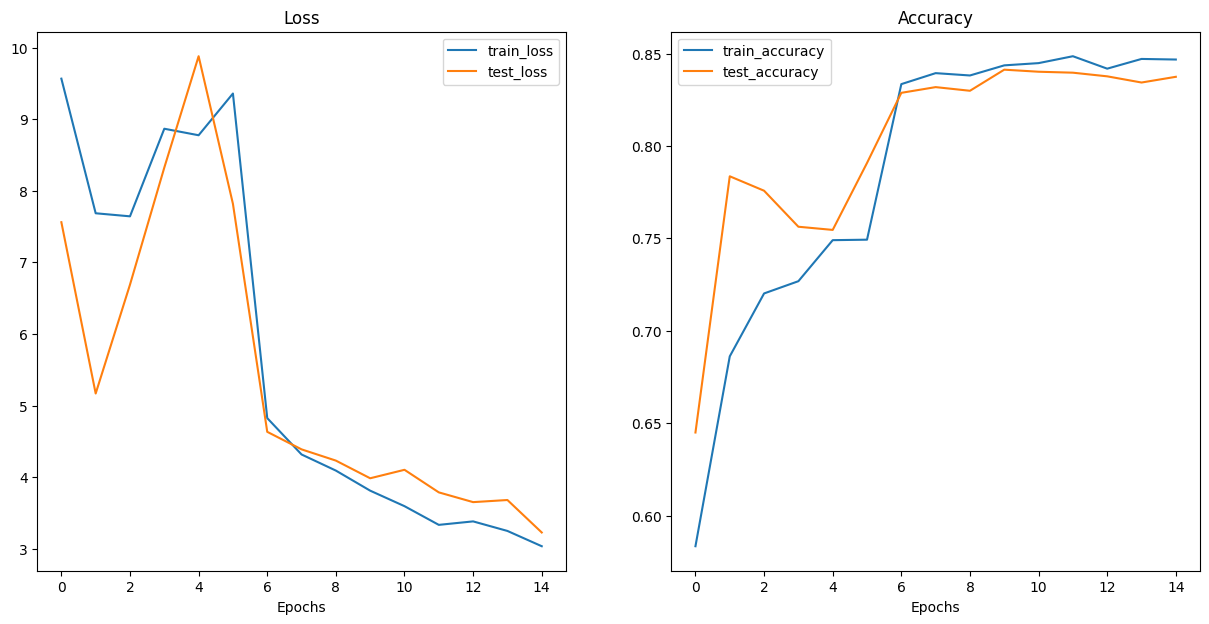

In [ ]:
plot_loss_curves(model_results)

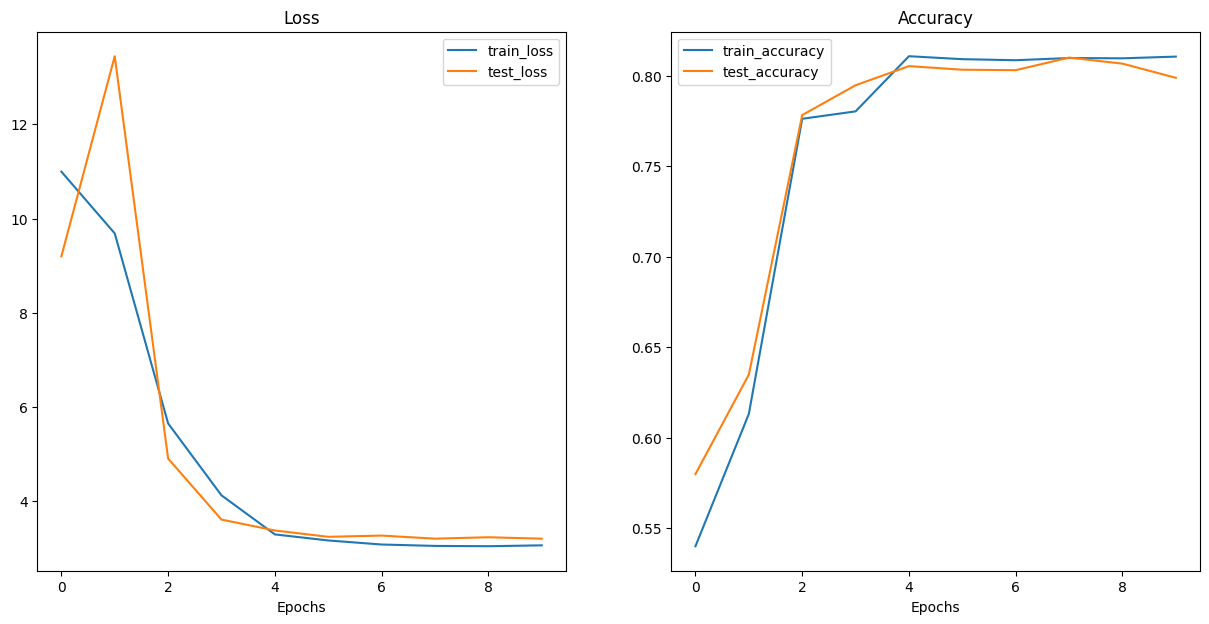

In [ ]:
plot_loss_curves(model_1_results)

## Check model on custom images

In [ ]:
class_maps = train_data.class_to_idx
class_maps

{'abraham_grampa_simpson': 0,
 'apu_nahasapeemapetilon': 1,
 'bart_simpson': 2,
 'charles_montgomery_burns': 3,
 'chief_wiggum': 4,
 'comic_book_guy': 5,
 'edna_krabappel': 6,
 'homer_simpson': 7,
 'kent_brockman': 8,
 'krusty_the_clown': 9,
 'lisa_simpson': 10,
 'marge_simpson': 11,
 'milhouse_van_houten': 12,
 'moe_szyslak': 13,
 'ned_flanders': 14,
 'nelson_muntz': 15,
 'principal_skinner': 16,
 'sideshow_bob': 17}

In [ ]:
import numpy as np

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None):
    """Makes a prediction on a target image with a trained model and plots the image and prediction."""
    # Load in the image
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    image_before = Image.open(image_path)

    model.to('cpu')

    # Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # Transform if necessary
    if transform:
        target_image = transform(target_image)

    # Turn on eval/inference mode and make a prediction
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
        target_image = target_image.unsqueeze(0)

        # Make a prediction on the image with an extra dimension
        target_image_pred = model(target_image) # make sure the target image is on the right device

    # Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert predction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot the image alongside the prediction and prediction probability
    plt.imshow(image_before) # remove batch dimension and rearrange shape to be HWC
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max():.3f}"
    plt.title(title)
    plt.axis(False)

    for cl, pr in sorted(zip(list(class_maps.keys()),target_image_pred_probs[0]),key=lambda x: x[1]):
      print(f'{cl} | Prob: {pr:.4f}')

    print('-'*20)

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_dir / "custom-homer_simpson_2.jpeg"
url = 'https://yale2023.yale.edu/sites/default/files/giamatti_1_2_1_0_0_0_0_0.jpg'

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get(url)
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download...")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


nelson_muntz | Prob: 0.0000
moe_szyslak | Prob: 0.0000
apu_nahasapeemapetilon | Prob: 0.0000
milhouse_van_houten | Prob: 0.0000
edna_krabappel | Prob: 0.0000
bart_simpson | Prob: 0.0000
chief_wiggum | Prob: 0.0000
krusty_the_clown | Prob: 0.0000
kent_brockman | Prob: 0.0000
ned_flanders | Prob: 0.0000
lisa_simpson | Prob: 0.0000
marge_simpson | Prob: 0.0000
sideshow_bob | Prob: 0.0000
comic_book_guy | Prob: 0.0000
homer_simpson | Prob: 0.0000
abraham_grampa_simpson | Prob: 0.0001
principal_skinner | Prob: 0.1350
charles_montgomery_burns | Prob: 0.8649
--------------------


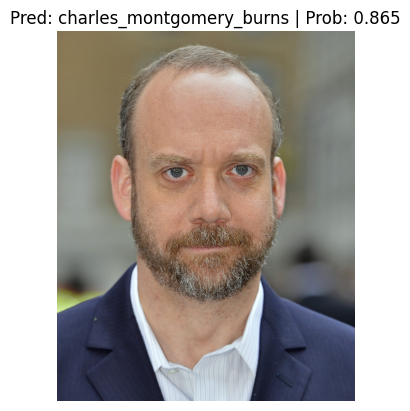

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=transformer)

## Save a model

In [ ]:
os.mkdir('models')

In [ ]:
torch.save(model.state_dict(),f = 'models/model_resnet18_10_epoch')

In [ ]:
loaded_model, transforms = create_resnet(len(class_names))


loaded_model.load_state_dict(torch.load('models/model_resnet18_10_epoch'))

<All keys matched successfully>